In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 데이터셋 불러오기
dataset = pd.read_csv('../data/raw.csv', encoding='cp949')  # 예: 'data.csv'

# 텍스트 데이터 전처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['Machinery'])
sequences = tokenizer.texts_to_sequences(dataset['Machinery'])
word_index = tokenizer.word_index
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 카테고리 데이터 전처리
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['key2'])

# 데이터셋을 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 딥러닝 모델 생성
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 새로운 데이터 예측
new_text = ['NO.2 GENERATOR ENGINE']
new_sequence = tokenizer.texts_to_sequences(new_text)
new_X = pad_sequences(new_sequence, maxlen=max_sequence_length)
predictions = model.predict(new_X)
predicted_class = label_encoder.inverse_transform(predictions.argmax(axis=-1))
print("새로운 데이터 예측 카테고리:", predicted_class)

UnicodeDecodeError: 'cp949' codec can't decode byte 0xeb in position 73: illegal multibyte sequence

In [1]:
import tensorflow as tf

# BTS 의 butter 가사

butter = """
Smooth like butter/
Like a criminal undercover/
Gon' pop like trouble/
Breakin' into your heart like that/
Cool shade stunner/
Yeah, I owe it all to my mother/
Hot like summer/
Yeah, I'm makin' you sweat like that/
Break it down/
"""
print(butter.split("/"))
butter = butter.split("/")
# butter = [line.strip() for line in butter]
butter = [line.split() for line in butter]

print(butter)
butter

['\nSmooth like butter', '\nLike a criminal undercover', "\nGon' pop like trouble", "\nBreakin' into your heart like that", '\nCool shade stunner', '\nYeah, I owe it all to my mother', '\nHot like summer', "\nYeah, I'm makin' you sweat like that", '\nBreak it down', '\n']
[['Smooth', 'like', 'butter'], ['Like', 'a', 'criminal', 'undercover'], ["Gon'", 'pop', 'like', 'trouble'], ["Breakin'", 'into', 'your', 'heart', 'like', 'that'], ['Cool', 'shade', 'stunner'], ['Yeah,', 'I', 'owe', 'it', 'all', 'to', 'my', 'mother'], ['Hot', 'like', 'summer'], ['Yeah,', "I'm", "makin'", 'you', 'sweat', 'like', 'that'], ['Break', 'it', 'down'], []]


[['Smooth', 'like', 'butter'],
 ['Like', 'a', 'criminal', 'undercover'],
 ["Gon'", 'pop', 'like', 'trouble'],
 ["Breakin'", 'into', 'your', 'heart', 'like', 'that'],
 ['Cool', 'shade', 'stunner'],
 ['Yeah,', 'I', 'owe', 'it', 'all', 'to', 'my', 'mother'],
 ['Hot', 'like', 'summer'],
 ['Yeah,', "I'm", "makin'", 'you', 'sweat', 'like', 'that'],
 ['Break', 'it', 'down'],
 []]

In [2]:
# 학습에 사용할 단어장을 만들어 보자!
tokenizer1 = tf.keras.preprocessing.text.Tokenizer()

# Updates internal vocabulary based on a list of sequences.
tokenizer1.fit_on_texts(butter)
# print('tokenizer1.word_index', tokenizer1.word_index)

print('tokenizer1.index_docs', tokenizer1.index_docs)
print('tokenizer1.index_word', tokenizer1.index_word) # 빈도수 순으로 순서 보장
# print('tokenizer1.word_index', tokenizer1.word_index) #
# print('tokenizer1.word_docs', tokenizer1.word_docs)
# print('tokenizer1.word_counts', tokenizer1.word_counts)
# print('tokenizer1.word_counts', sorted(tokenizer1.word_counts.items(), key=lambda x: x[1], reverse=True))

tokenizer1.index_docs defaultdict(<class 'int'>, {1: 6, 6: 1, 5: 1, 9: 1, 8: 1, 7: 1, 12: 1, 11: 1, 10: 1, 14: 1, 2: 2, 13: 1, 15: 1, 16: 1, 19: 1, 18: 1, 17: 1, 25: 1, 4: 2, 22: 1, 21: 1, 24: 1, 3: 2, 20: 1, 23: 1, 27: 1, 26: 1, 30: 1, 29: 1, 28: 1, 31: 1, 32: 1, 33: 1})
tokenizer1.index_word {1: 'like', 2: 'that', 3: 'yeah,', 4: 'it', 5: 'smooth', 6: 'butter', 7: 'a', 8: 'criminal', 9: 'undercover', 10: "gon'", 11: 'pop', 12: 'trouble', 13: "breakin'", 14: 'into', 15: 'your', 16: 'heart', 17: 'cool', 18: 'shade', 19: 'stunner', 20: 'i', 21: 'owe', 22: 'all', 23: 'to', 24: 'my', 25: 'mother', 26: 'hot', 27: 'summer', 28: "i'm", 29: "makin'", 30: 'you', 31: 'sweat', 32: 'break', 33: 'down'}


In [3]:
# 단어장을 이용해 butter 가사를 숫자로 변경해 보자!
encoded_butter=tokenizer1.texts_to_sequences(butter) # 텍스트를 숫자(인덱스) 로 변경해줌
encoded_butter
# tokenizer1.texts_to_sequences(butter)

[[5, 1, 6],
 [1, 7, 8, 9],
 [10, 11, 1, 12],
 [13, 14, 15, 16, 1, 2],
 [17, 18, 19],
 [3, 20, 21, 4, 22, 23, 24, 25],
 [26, 1, 27],
 [3, 28, 29, 30, 31, 1, 2],
 [32, 4, 33],
 []]

In [ ]:
# OOV: Out-Of-Vocabulary
# 사전에서 빈도수 높은 단어 5개만 사용
# 사전에 없는 단어는? <OOV> 처리!
tokenizer1 = tf.keras.preprocessing.text.Tokenizer(num_words=5, oov_token='<OOV>')
tokenizer1.fit_on_texts(butter)
print('tokenizer1.index_docs', tokenizer1.index_docs)
print('tokenizer1.index_word', tokenizer1.index_word)
print('tokenizer1.word_index', tokenizer1.word_index)
encoded_butter = tokenizer1.texts_to_sequences(butter)
encoded_butter

In [ ]:
# 문장의 길이가 다르므로 일치시켜 보자! 
# (MNIST 이미지 데이터의 모양은 모두 28 x 28)
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_butter=pad_sequences(encoded_butter)
pad_sequences(encoded_butter)
#pad_sequences(encoded_butter, padding='post')

In [ ]:
pad_sequences(encoded_butter, maxlen=6)

In [ ]:
# Dense Layer 에 입력으로 사용해 보자!
# one-hot encoding
# Converts a class vector (integers) to binary class matrix.
# tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
from tensorflow.keras.utils import to_categorical
to_categorical(encoded_butter[0])

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw_postpro.csv', encoding='cp949')

In [58]:
df.columns

Index(['청구서번호', 'No.', 'Subject', 'Machinery', 'Assembly', '청구품목', 'Part No.1',
       'Part No.2', 'key1', 'key2', '리드타임_음수제거', '청구량', '견적', '견적수량', '견적화폐',
       '견적단가', '발주번호', '발주처', '발주', '발주수량', '발주금액', 'D/T', '미입고 기간', '리드타임',
       '창고입고', '창고입고수량', 'Control No.', '입고창고', '창고출고', '창고출고수량', '출고선박',
       '출고운반선', '선박입고', '선박입고수량', '완료 여부', 'leadtime'],
      dtype='object')

In [59]:
df.head(3)

,청구서번호,No.,Subject,Machinery,Assembly,청구품목,Part No.1,Part No.2,key1,key2,...,Control No.,입고창고,창고출고,창고출고수량,출고선박,출고운반선,선박입고,선박입고수량,완료 여부,leadtime
0,ELS-BS-ESP-2004002,12,NO.1 A/E C18 MAJOR O/H PARTS,NO.1 GENERATOR ENGINE,323-6480 LINES GP-FUEL,SEAL-O-RING-STOR,7.00E-275,0,7.00E-275,COOLER,...,혜인 발주,BS,2020-09-19,1,BLO,본선 선적,0,0,0,194
1,OCA-BS-ESP-2010004,5,운전시간 대비 #2 AUX ENG TOP END O/H PARTS,NO.2 GENERATOR ENGINE,GASKET KIT,OIL COOLER & LINES,7.00E-275,0,7.00E-275,COOLER,...,혜인 발주,BS,2020-09-18,1,JBG,본선 선적,0,0,0,59
2,MIR-BS-ESP-2011002,119,운전시간 대비 #2 AUX ENG(CAT 3512C) MAJOR O/H PARTS,NO.2 GENERATOR ENGINE,285-8374 MANIFOLD GP-EXH,WASHER,7.00E-275,0,7.00E-275,COOLER,...,0,BS,2020-12-12,1,BON,SANWA FONTAINE,0,0,0,61


In [14]:
grouped_key2_df = df.groupby('key2')
# group_sizes = grouped_df.size()
group_key2_sizes = grouped_key2_df.size().reset_index(name='group_count')
group_key2_sizes

,key2,group_count
0,ADAPTER,167
1,ANODES,33
2,ARM,77
3,BATTERY,41
4,BEARING,1167
...,...,...
56,UNIT,282
57,VALVE,999
58,WASHER,685
59,WINCH,33


<function matplotlib.pyplot.show(close=None, block=None)>

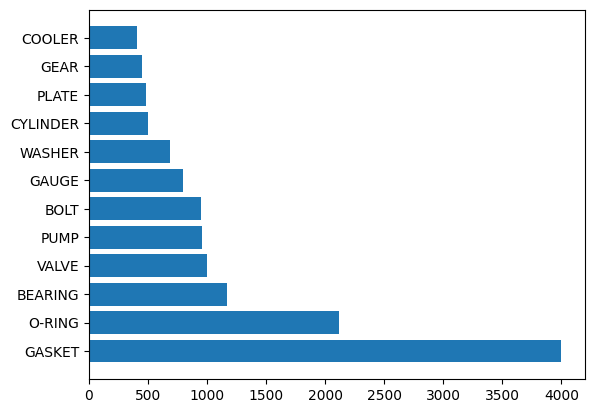

In [37]:
sorted_group_key2_sizes = group_key2_sizes.sort_values('group_count', ascending=False)
sorted_group_key2_sizes = sorted_group_key2_sizes[sorted_group_key2_sizes["group_count"] >= 400]
sorted_group_key2_sizes
# import seaborn as sns
import matplotlib.pyplot as plt
plt.barh(sorted_group_key2_sizes["key2"],sorted_group_key2_sizes["group_count"])
# plt.xlabel("key2")
# plt.ylabel('count')
# sns.countplot( y="key2", data=sorted_group_key2_sizes)
# plt.xlim(500, 4200)
plt.show


In [16]:
df['발주'] = pd.to_datetime(df['발주'])
df['창고입고'] = pd.to_datetime(df['창고입고'])
df['leadtime'] =  df['창고입고'] - df['발주'] 
# int로 형변환
df['leadtime'] = df['leadtime'].apply(lambda x: x.days)
df['leadtime']

0        194
1         59
2         61
3        212
4        220
        ... 
20512     95
20513     67
20514     25
20515     25
20516     25
Name: leadtime, Length: 20517, dtype: int64

In [71]:
grouped_leadtime_df = df.groupby('leadtime')
# group_sizes = grouped_df.size()
grouped_leadtime_sizes = grouped_leadtime_df.size().reset_index(name='group_count')
grouped_leadtime_sizes = grouped_leadtime_sizes.sort_values('leadtime', ascending=False)
grouped_leadtime_sizes = grouped_leadtime_sizes[grouped_leadtime_sizes["leadtime"] <= 400]
# grouped_leadtime_sizes.loc[250:]
grouped_leadtime_sizes

,leadtime,group_count
268,396,2
267,394,2
266,393,1
265,392,2
264,391,1
...,...,...
4,4,267
3,3,263
2,2,134
1,1,166


<function matplotlib.pyplot.show(close=None, block=None)>

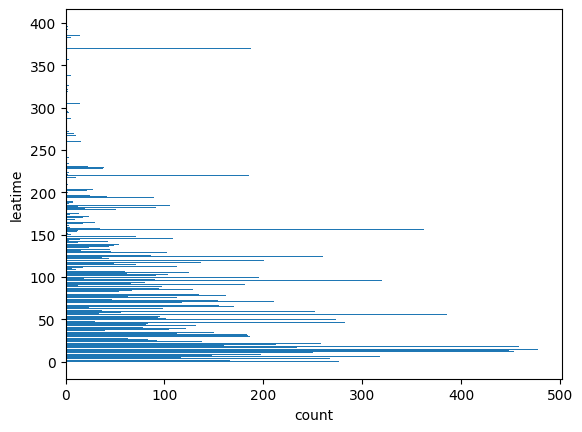

In [74]:
import matplotlib.pyplot as plt
plt.barh(grouped_leadtime_sizes["leadtime"],grouped_leadtime_sizes["group_count"])
plt.xlabel("count")
plt.ylabel('leatime')
plt.show